# (13주차) 5월30일
> 오버피팅, 학습과정분석
- toc:true
- branch: master
- badges: true
- comments: true
- author: 최규빈
- categories : [Bigdata]

### 강의영상 

>youtube: https://youtube.com/playlist?list=PLQqh36zP38-zqKeXVRkZpHNXHcRDiz1--

### imports 

In [1]:
import numpy as np
import tensorflow as tf 
import tensorflow.experimental.numpy as tnp 

In [2]:
tnp.experimental_enable_numpy_behavior()

In [3]:
import matplotlib.pyplot as plt 

In [4]:
%load_ext tensorboard

### 오버피팅 

#### 오버피팅으로 착각하기 쉬운 상황

`3-(1)` 아래와 같은 모형을 고려하자. 

$$y_i= \beta_0 + \sum_{k=1}^{5} \beta_k \cos(k t_i)+\epsilon_i$$

여기에서 $t=(t_1,\dots,t_{1000})=$ `np.linspace(0,5,1000)` 이다. 그리고 $\epsilon_i \sim i.i.d~ N(0,\sigma^2)$, 즉 서로 독립인 표준정규분포에서 추출된 샘플이다. 위의 모형에서 아래와 같은 데이터를 관측했다고 가정하자. 

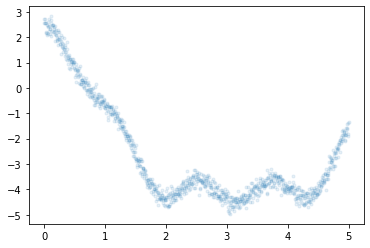

In [5]:
np.random.seed(43052)
t= np.linspace(0,5,1000)
y = -2+ 3*np.cos(t) + 1*np.cos(2*t) + 0.5*np.cos(5*t) + np.random.randn(1000)*0.2
plt.plot(t,y,'.',alpha=0.1)

tf.keras를 이용하여 $\beta_0,\dots,\beta_5$를 추정하라. ($\beta_0,\dots,\beta_5$의 참값은 각각 -2,3,1,0,0,0.5 이다) 

**(풀이)**

`-` 다시 풀어보자 

In [7]:
y = y.reshape(1000,1)
x1 = np.cos(t) 
x2 = np.cos(2*t)
x3 = np.cos(3*t)
x4 = np.cos(4*t)
x5 = np.cos(5*t)
X = tf.stack([x1,x2,x3,x4,x5],axis=1)

In [8]:
#collapse_output
!rm -rf logs
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(1)) 
net.compile(loss='mse',optimizer='adam')
net.fit(X,y,epochs=500,batch_size=100, validation_split=0.45, callbacks=tf.keras.callbacks.TensorBoard()) 
# 텐서보드를 이용한 시각화기능 추가 
# validation_split 이용

Epoch 1/500
6/6 [==============================] - 2s 34ms/step - loss: 6.3974 - val_loss: 11.7199
Epoch 2/500
6/6 [==============================] - 0s 24ms/step - loss: 6.3478 - val_loss: 11.6561
Epoch 3/500
6/6 [==============================] - 0s 22ms/step - loss: 6.2991 - val_loss: 11.5942
Epoch 4/500
6/6 [==============================] - 0s 23ms/step - loss: 6.2500 - val_loss: 11.5342
Epoch 5/500
6/6 [==============================] - 0s 22ms/step - loss: 6.2009 - val_loss: 11.4764
Epoch 6/500
6/6 [==============================] - 0s 24ms/step - loss: 6.1537 - val_loss: 11.4175
Epoch 7/500
6/6 [==============================] - 0s 24ms/step - loss: 6.1062 - val_loss: 11.3580
Epoch 8/500
6/6 [==============================] - 0s 23ms/step - loss: 6.0592 - val_loss: 11.2987
Epoch 9/500
6/6 [==============================] - 0s 22ms/step - loss: 6.0121 - val_loss: 11.2408
Epoch 10/500
6/6 [==============================] - 0s 23ms/step - loss: 5.9649 - val_loss: 11.1837
Epoch 11/

`-` 결과시각화 

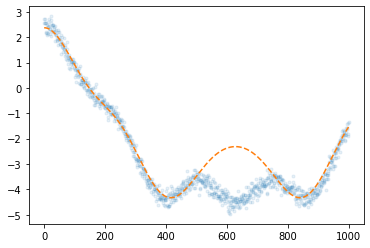

In [9]:
plt.plot(y,'.',alpha=0.1)
plt.plot(net(X),'--')

`-` 왼쪽부터 * 0.55 까지는 학습에 들어간 데이터, 나머지는 validation 데이터다.  
`-` 보여준 데이터에서는 잘 맞추는것 같지만 validation에서는 엉망이다. -> 오버피팅인가? -> 텐서보드로 확인

In [10]:
%tensorboard --logdir logs --host 0.0.0.0 

- 확인결과: 에폭마다 val_loss 가 줄어들고 있기는 하다 (늦게 줄어들뿐) -> 오버피팅이라기보다 val_set에 들어있는 자료를 예측하기에는 보여준 데이터가 불충분하다라고 해석하는것이 더 옳음 (모형자체의 문제는 아님)

`-` 해결하는 방법? 그냥 더 학습시키면된다. 

In [11]:
#collapse_output
!rm -rf logs
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(1)) 
net.compile(loss='mse',optimizer='adam')
net.fit(X,y,epochs=2000,batch_size=100, validation_split=0.45, callbacks=tf.keras.callbacks.TensorBoard()) 
# 텐서보드를 이용한 시각화기능 추가 
# validation_split 이용

Epoch 1/2000
6/6 [==============================] - 0s 29ms/step - loss: 5.8452 - val_loss: 13.3431
Epoch 2/2000
6/6 [==============================] - 0s 22ms/step - loss: 5.7980 - val_loss: 13.2987
Epoch 3/2000
6/6 [==============================] - 0s 23ms/step - loss: 5.7517 - val_loss: 13.2555
Epoch 4/2000
6/6 [==============================] - 0s 24ms/step - loss: 5.7070 - val_loss: 13.2113
Epoch 5/2000
6/6 [==============================] - 0s 22ms/step - loss: 5.6610 - val_loss: 13.1683
Epoch 6/2000
6/6 [==============================] - 0s 23ms/step - loss: 5.6149 - val_loss: 13.1255
Epoch 7/2000
6/6 [==============================] - 0s 22ms/step - loss: 5.5712 - val_loss: 13.0831
Epoch 8/2000
6/6 [==============================] - 0s 22ms/step - loss: 5.5257 - val_loss: 13.0391
Epoch 9/2000
6/6 [==============================] - 0s 22ms/step - loss: 5.4827 - val_loss: 12.9965
Epoch 10/2000
6/6 [==============================] - 0s 24ms/step - loss: 5.4388 - val_loss: 12.9552

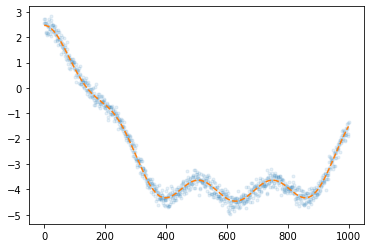

In [12]:
plt.plot(y,'.',alpha=0.1)
plt.plot(net(X),'--')

In [16]:
%tensorboard --logdir logs --host 0.0.0.0 

Reusing TensorBoard on port 6006 (pid 558221), started 0:00:17 ago. (Use '!kill 558221' to kill it.)

In [17]:
!kill 558221

- 이런것은 오버핏이 아님!

`-` 결론적으로 말해서 위와 같은 net는 설계하였을 경우 val을 빼는 것은 어리석음. (데이터만 버리는 꼴임)

`-` 더 많은 데이터를 남겨주면 더 빨리 학습한다. 

In [18]:
#collapse_output
!rm -rf logs
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(1)) 
net.compile(loss='mse',optimizer='adam')
net.fit(X,y,epochs=500,batch_size=100, validation_split=0.1, callbacks=tf.keras.callbacks.TensorBoard()) 

Epoch 1/500
9/9 [==============================] - 0s 15ms/step - loss: 15.3797 - val_loss: 9.3917
Epoch 2/500
9/9 [==============================] - 0s 9ms/step - loss: 15.2747 - val_loss: 9.3399
Epoch 3/500
9/9 [==============================] - 0s 9ms/step - loss: 15.1710 - val_loss: 9.2869
Epoch 4/500
9/9 [==============================] - 0s 9ms/step - loss: 15.0695 - val_loss: 9.2344
Epoch 5/500
9/9 [==============================] - 0s 9ms/step - loss: 14.9673 - val_loss: 9.1815
Epoch 6/500
9/9 [==============================] - 0s 8ms/step - loss: 14.8652 - val_loss: 9.1257
Epoch 7/500
9/9 [==============================] - 0s 9ms/step - loss: 14.7646 - val_loss: 9.0667
Epoch 8/500
9/9 [==============================] - 0s 9ms/step - loss: 14.6638 - val_loss: 9.0139
Epoch 9/500
9/9 [==============================] - 0s 9ms/step - loss: 14.5643 - val_loss: 8.9540
Epoch 10/500
9/9 [==============================] - 0s 9ms/step - loss: 14.4664 - val_loss: 8.8971
Epoch 11/500
9/9 [

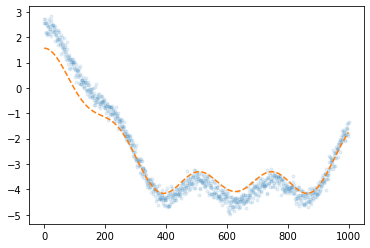

In [19]:
plt.plot(y,'.',alpha=0.1)
plt.plot(net(X),'--')

In [21]:
%tensorboard --logdir logs --host 0.0.0.0 

Reusing TensorBoard on port 6006 (pid 567827), started 0:00:07 ago. (Use '!kill 567827' to kill it.)

In [23]:
!kill 567827

#### 텐서보드: 적합결과 시각화

`-` 시각화결과는 모두 텐서보드에서 보고 싶다! 적합결과를 보여주는 fig 오브젝트를 텐서보드에 끼워넣어서 출력하는 방법을 알아보자.

In [24]:
#collapse_output
!rm -rf logs
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(1)) 
net.compile(loss='mse',optimizer='adam')
net.fit(X,y,epochs=500,batch_size=100, validation_split=0.1, callbacks=tf.keras.callbacks.TensorBoard()) 

Epoch 1/500
9/9 [==============================] - 0s 15ms/step - loss: 9.0557 - val_loss: 16.3762
Epoch 2/500
9/9 [==============================] - 0s 9ms/step - loss: 8.9771 - val_loss: 16.2111
Epoch 3/500
9/9 [==============================] - 0s 9ms/step - loss: 8.8986 - val_loss: 16.0595
Epoch 4/500
9/9 [==============================] - 0s 9ms/step - loss: 8.8204 - val_loss: 15.9042
Epoch 5/500
9/9 [==============================] - 0s 9ms/step - loss: 8.7431 - val_loss: 15.7508
Epoch 6/500
9/9 [==============================] - 0s 9ms/step - loss: 8.6670 - val_loss: 15.6014
Epoch 7/500
9/9 [==============================] - 0s 9ms/step - loss: 8.5906 - val_loss: 15.4505
Epoch 8/500
9/9 [==============================] - 0s 9ms/step - loss: 8.5152 - val_loss: 15.3034
Epoch 9/500
9/9 [==============================] - 0s 9ms/step - loss: 8.4395 - val_loss: 15.1566
Epoch 10/500
9/9 [==============================] - 0s 9ms/step - loss: 8.3658 - val_loss: 15.0060
Epoch 11/500
9/9 [

In [31]:
%tensorboard --logdir logs --host 0.0.0.0 

Reusing TensorBoard on port 6006 (pid 577412), started 0:03:12 ago. (Use '!kill 577412' to kill it.)

In [32]:
!kill 577412

`-` 끼워넣을 오브젝트 만들기

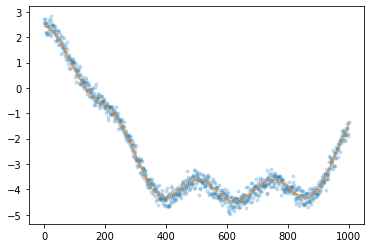

In [27]:
fig, ax = plt.subplots() 
ax.plot(y,'.',alpha=0.2)
ax.plot(net(X),'--')

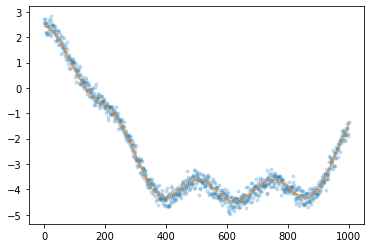

In [28]:
fig

`-` 이제 fig 오브젝트를 끼워넣을 코드를 구성하자. (공식홈페이지 참고)

- https://www.tensorflow.org/tensorboard/image_summaries

In [29]:
# 이코드는 한번만 실행
#from datetime import datetime
import io
logdir = "logs" 
#logdir = "logs" + datetime.now().strftime("%Y%m%d-%H%M%S")

def plot_to_image(fig): # 사용자가 지정한 그림오브젝트 fig를 넣으면 텐서보드에 끼워넣을수 있는 형태로 출력해주는 함수 
    """Converts the matplotlib plot specified by 'figure' to a PNG image and
    returns it. The supplied figure is closed and inaccessible after this call."""
    # Save the plot to a PNG in memory.
    buf = io.BytesIO()
    fig.savefig(buf, format='png')
    # Closing the figure prevents it from being displayed directly inside
    # the notebook.
    plt.close(fig)
    buf.seek(0)
    # Convert PNG buffer to TF image
    image = tf.image.decode_png(buf.getvalue(), channels=4)
    # Add the batch dimension
    image = tf.expand_dims(image, 0)
    return image

In [30]:
with tf.summary.create_file_writer(logdir).as_default():
    tf.summary.image("적합결과시각화", plot_to_image(fig), step=0)

In [34]:
%tensorboard --logdir logs --host 0.0.0.0

Reusing TensorBoard on port 6006 (pid 577501), started 0:00:17 ago. (Use '!kill 577501' to kill it.)

In [35]:
!kill 577501

### 학습과정분석

#### 텐서보드: 가중치 시각화

`-` 에폭별로 가중치가 수렴하는 모양을 보고 싶다.

`3-(1)` 아래와 같은 모형을 고려하자. 

$$y_i= \beta_0 + \sum_{k=1}^{5} \beta_k \cos(k t_i)+\epsilon_i$$

여기에서 $t=(t_1,\dots,t_{1000})=$ `np.linspace(0,5,1000)` 이다. 그리고 $\epsilon_i \sim i.i.d~ N(0,\sigma^2)$, 즉 서로 독립인 표준정규분포에서 추출된 샘플이다. 위의 모형에서 아래와 같은 데이터를 관측했다고 가정하자. 

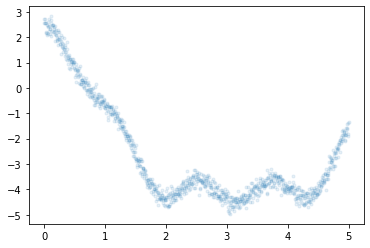

In [36]:
np.random.seed(43052)
t= np.linspace(0,5,1000)
y = -2+ 3*np.cos(t) + 1*np.cos(2*t) + 0.5*np.cos(5*t) + np.random.randn(1000)*0.2
plt.plot(t,y,'.',alpha=0.1)

`-` 학습을 진행하면서 가중치가 어떻게 업데이트 되는지 시각화하자.

In [37]:
# y = -2+ 3*np.cos(t) + 1*np.cos(2*t) + 0.5*np.cos(5*t) + np.random.randn(1000)*0.2

In [38]:
#collapse_output
!rm -rf logs
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(1))
net.compile(loss='mse',optimizer='adam')
cb1= tf.keras.callbacks.TensorBoard(update_freq='epoch',histogram_freq=100)
net.fit(X,y,epochs=2000, batch_size=100, validation_split=0.45,callbacks=cb1)

Epoch 1/2000
6/6 [==============================] - 0s 36ms/step - loss: 8.9406 - val_loss: 18.5093
Epoch 2/2000
6/6 [==============================] - 0s 22ms/step - loss: 8.8787 - val_loss: 18.4504
Epoch 3/2000
6/6 [==============================] - 0s 23ms/step - loss: 8.8174 - val_loss: 18.3917
Epoch 4/2000
6/6 [==============================] - 0s 22ms/step - loss: 8.7574 - val_loss: 18.3325
Epoch 5/2000
6/6 [==============================] - 0s 23ms/step - loss: 8.6976 - val_loss: 18.2738
Epoch 6/2000
6/6 [==============================] - 0s 22ms/step - loss: 8.6380 - val_loss: 18.2155
Epoch 7/2000
6/6 [==============================] - 0s 23ms/step - loss: 8.5793 - val_loss: 18.1572
Epoch 8/2000
6/6 [==============================] - 0s 25ms/step - loss: 8.5204 - val_loss: 18.1006
Epoch 9/2000
6/6 [==============================] - 0s 24ms/step - loss: 8.4612 - val_loss: 18.0435
Epoch 10/2000
6/6 [==============================] - 0s 22ms/step - loss: 8.4042 - val_loss: 17.9854

In [39]:
net.weights

[<tf.Variable 'dense_4/kernel:0' shape=(5, 1) dtype=float32, numpy=
 array([[ 2.9994037 ],
        [ 1.0102386 ],
        [-0.01352747],
        [ 0.00321216],
        [ 0.485407  ]], dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(1,) dtype=float32, numpy=array([-2.009481], dtype=float32)>]

In [40]:
net.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [43]:
%tensorboard --logdir logs --host 0.0.0.0

Reusing TensorBoard on port 6006 (pid 615633), started 0:05:20 ago. (Use '!kill 615633' to kill it.)

In [44]:
!kill 615633

- 뾰족 그림은 각 값으로 가는 과정을 시각화 해줌. 색이 진해질수록 가중치 값에 가까워짐

#### 텐서보드: 사용자지정그림 에폭별로 시각화 (1)

`-` 100에폭마다 적합결과를 시각화 하고 싶다 + 가중치와 같이!!
- https://www.tensorflow.org/guide/keras/custom_callback

`-` 일단 "100에폭마다 가중치적합과정 시각화 + 최종적합곡선 시각화" 까지 구현

In [45]:
#collapse_output
!rm -rf logs
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(1))
net.compile(loss='mse',optimizer='adam')
cb1= tf.keras.callbacks.TensorBoard(update_freq='epoch',histogram_freq=100)
net.fit(X,y,epochs=2000, batch_size=100, validation_split=0.45,callbacks=cb1)

Epoch 1/2000
6/6 [==============================] - 0s 31ms/step - loss: 8.4592 - val_loss: 15.0689
Epoch 2/2000
6/6 [==============================] - 0s 22ms/step - loss: 8.3982 - val_loss: 15.0127
Epoch 3/2000
6/6 [==============================] - 0s 22ms/step - loss: 8.3368 - val_loss: 14.9570
Epoch 4/2000
6/6 [==============================] - 0s 23ms/step - loss: 8.2771 - val_loss: 14.9010
Epoch 5/2000
6/6 [==============================] - 0s 23ms/step - loss: 8.2190 - val_loss: 14.8449
Epoch 6/2000
6/6 [==============================] - 0s 22ms/step - loss: 8.1583 - val_loss: 14.7900
Epoch 7/2000
6/6 [==============================] - 0s 22ms/step - loss: 8.1000 - val_loss: 14.7355
Epoch 8/2000
6/6 [==============================] - 0s 22ms/step - loss: 8.0416 - val_loss: 14.6811
Epoch 9/2000
6/6 [==============================] - 0s 23ms/step - loss: 7.9843 - val_loss: 14.6274
Epoch 10/2000
6/6 [==============================] - 0s 22ms/step - loss: 7.9262 - val_loss: 14.5749

In [46]:
fig, ax = plt.subplots() 
ax.plot(y,'.',alpha=0.2)
ax.plot(net(X),'--')
with tf.summary.create_file_writer(logdir).as_default():
    tf.summary.image("적합결과시각화", plot_to_image(fig), step=0)

In [51]:
%tensorboard --logdir logs --host 0.0.0.0 

Reusing TensorBoard on port 6006 (pid 691835), started 0:06:58 ago. (Use '!kill 691835' to kill it.)

In [52]:
!kill 691835

`-` 아래의 코드를 100에폭마다 실행하고 싶다. 

```python
fig, ax = plt.subplots() 
ax.plot(y,'.',alpha=0.2)
ax.plot(net(X),'--')
with tf.summary.create_file_writer(logdir).as_default():
    tf.summary.image("적합결과시각화", plot_to_image(fig), step=0)
```

`-` 일단 net.fit직전까지의 코드를 구현 

In [48]:
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(1))
net.compile(loss='mse',optimizer='adam')

`-` 사용자정의 콜백클래스를 만듬 

In [49]:
class PlotYhat(tf.keras.callbacks.Callback):
    def on_epoch_begin(self,epoch,logs): # 입력은 무조건 self, epoch, logs를 써야합니다 --> 이 함수안에 에폭이 끝날때마다 할 동작을 정의한다. 
        if epoch % 100 ==0: 
            fig, ax = plt.subplots() 
            ax.plot(y,'.',alpha=0.2)
            ax.plot(net(X),'--')
            with tf.summary.create_file_writer(logdir).as_default():
                tf.summary.image("적합결과시각화"+str(epoch), plot_to_image(fig), step=0)

`-` 내가 만든 클래스에서 cb2를 생성

In [50]:
#collapse_output
!rm -rf logs
cb1= tf.keras.callbacks.TensorBoard(update_freq='epoch',histogram_freq=100)
cb2= PlotYhat() 
net.fit(X,y,epochs=2000, batch_size=100, validation_split=0.45,callbacks=[cb1,cb2])

Epoch 1/2000
6/6 [==============================] - 0s 31ms/step - loss: 10.4913 - val_loss: 15.7302
Epoch 2/2000
6/6 [==============================] - 0s 22ms/step - loss: 10.4307 - val_loss: 15.6661
Epoch 3/2000
6/6 [==============================] - 0s 22ms/step - loss: 10.3696 - val_loss: 15.6020
Epoch 4/2000
6/6 [==============================] - 0s 23ms/step - loss: 10.3077 - val_loss: 15.5382
Epoch 5/2000
6/6 [==============================] - 0s 22ms/step - loss: 10.2473 - val_loss: 15.4737
Epoch 6/2000
6/6 [==============================] - 0s 22ms/step - loss: 10.1858 - val_loss: 15.4091
Epoch 7/2000
6/6 [==============================] - 0s 23ms/step - loss: 10.1254 - val_loss: 15.3449
Epoch 8/2000
6/6 [==============================] - 0s 22ms/step - loss: 10.0659 - val_loss: 15.2799
Epoch 9/2000
6/6 [==============================] - 0s 22ms/step - loss: 10.0052 - val_loss: 15.2162
Epoch 10/2000
6/6 [==============================] - 0s 22ms/step - loss: 9.9450 - val_loss

In [62]:
%tensorboard --logdir logs --host 0.0.0.0 

Reusing TensorBoard on port 6006 (pid 729957), started 0:14:35 ago. (Use '!kill 729957' to kill it.)

In [63]:
!kill 729957

#### 텐서보드: 사용자지정그림 에폭별로 시각화 (2) 

`-` 중간층의 출력결과를 시각화하고 싶다. 

`4`. Piecewise-linear regression (15점) 

아래의 모형을 고려하자. 

model: $y_i=\begin{cases} x_i +0.3\epsilon_i & x\leq 0 \\ 3.5x_i +0.3\epsilon_i & x>0 \end{cases}$ 

아래는 위의 모형에서 생성한 샘플이다. 

In [54]:
## data 
np.random.seed(43052)
N=100
x= np.linspace(-1,1,N).reshape(N,1)
y= np.array(list(map(lambda x: x*1+np.random.normal()*0.3 if x<0 else x*3.5+np.random.normal()*0.3,x))).reshape(N,1)

(풀이)

In [56]:
tf.random.set_seed(43055) 
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(2))
net.add(tf.keras.layers.Activation(tf.nn.relu))
net.add(tf.keras.layers.Dense(1))
net.compile(optimizer='sgd',loss='mse')
net.fit(x,y,epochs=1,batch_size=100)

1/1 [==============================] - 0s 89ms/step - loss: 2.1414


In [57]:
l1,a1,l2 =net.layers

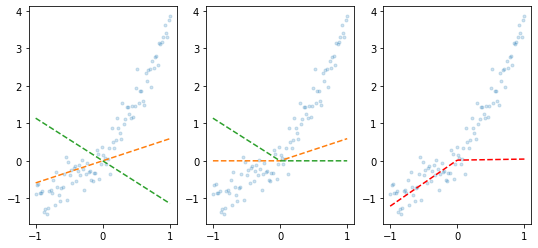

In [58]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3) 
fig.set_figwidth(9)
ax1.plot(x,y,'.',alpha=0.2); ax1.plot(x,l1(x),'--'); 
ax2.plot(x,y,'.',alpha=0.2); ax2.plot(x,a1(l1(x)),'--'); 
ax3.plot(x,y,'.',alpha=0.2); ax3.plot(x,l2(a1(l1(x))),'--r');

- 이런 그림이 100에폭마다 그려졌으면 좋겠다. 

`-` 새로운 클래스를 만들자. 

In [59]:
class PlotMidlayer(tf.keras.callbacks.Callback):
    def on_epoch_begin(self,epoch,logs): # 입력은 무조건 self, epoch, logs를 써야합니다 --> 이 함수안에 에폭이 끝날때마다 할 동작을 정의한다. 
        if epoch % 100 ==0: 
            fig, (ax1,ax2,ax3) = plt.subplots(1,3) 
            fig.set_figwidth(9)
            ax1.plot(x,y,'.',alpha=0.2); ax1.plot(x,l1(x),'--'); 
            ax2.plot(x,y,'.',alpha=0.2); ax2.plot(x,a1(l1(x)),'--'); 
            ax3.plot(x,y,'.',alpha=0.2); ax3.plot(x,l2(a1(l1(x))),'--r');            
            with tf.summary.create_file_writer(logdir).as_default():
                tf.summary.image("적합결과시각화"+str(epoch), plot_to_image(fig), step=0)

In [60]:
!rm -rf logs
cb1= tf.keras.callbacks.TensorBoard(update_freq='epoch',histogram_freq=100)
cb2= PlotMidlayer() 
net.fit(x,y,epochs=1000, batch_size=100,verbose=0 ,callbacks=[cb1,cb2])

In [64]:
%tensorboard --logdir logs --host 0.0.0.0 